<a href="https://colab.research.google.com/github/Utkarsh13tiwari/19CSE305/blob/KNN/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("face_mimic_df.csv") #importing the Dataset
data

,Unnamed: 0,id,age,gender,diagnosed,AU_01_t12,AU_06_t12,AU_12_t12,AU_04_t13,AU_07_t13,AU_09_t13,AU_01_t14,AU_02_t14,AU_04_t14
0,0,2019-09-25T18-51-06-885Z26,65.0,1,1,0.079102,0.252395,0.482137,0.216193,0.074656,0.005104,0.276285,0.103460,1.463085
1,1,2019-10-02T00-47-55-382Z3,57.0,1,1,0.059371,0.086916,0.147827,0.321326,0.100838,0.015806,0.339573,0.034221,0.327894
2,2,2019-10-03T13-13-40-042Z56,51.0,1,0,0.228496,0.517799,0.077302,0.023963,0.008114,0.009518,0.249356,0.187397,0.123984
3,3,2019-10-05T02-22-14-207Z34,72.0,1,1,0.058291,0.077728,0.170557,0.243995,0.012674,0.108509,1.021001,1.738898,0.254853
4,4,2019-10-05T14-19-59-179Z31,86.0,0,0,0.008417,0.215586,0.103639,0.081530,0.192569,0.007118,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,2020-04-18T17-29-39-337Z43,74.0,1,0,0.467770,0.058379,0.137685,0.226604,0.000440,0.001634,0.042374,0.001818,0.353959
513,513,2020-04-18T17-33-39-585Z56,67.0,0,1,0.005744,0.032865,0.189778,0.057712,0.212300,0.013286,0.309719,0.086577,0.000581
514,514,2020-04-18T21-15-17-924Z84,59.0,0,0,0.027014,0.557507,0.234040,0.976259,0.689190,0.030017,0.094675,0.070691,0.783146
515,515,2020-04-19T15-14-28-684Z91,64.0,0,0,0.021722,0.162771,0.905485,0.197712,0.198037,0.112724,0.059400,0.163631,1.268910


In [51]:
data.dtypes #chechking the datatypes

Unnamed: 0      int64
id             object
age           float64
gender          int64
diagnosed       int64
AU_01_t12     float64
AU_06_t12     float64
AU_12_t12     float64
AU_04_t13     float64
AU_07_t13     float64
AU_09_t13     float64
AU_01_t14     float64
AU_02_t14     float64
AU_04_t14     float64
dtype: object

In [52]:
print(data.isnull().sum()) #null values calculation

Unnamed: 0    0
id            0
age           0
gender        0
diagnosed     0
AU_01_t12     0
AU_06_t12     0
AU_12_t12     0
AU_04_t13     0
AU_07_t13     0
AU_09_t13     0
AU_01_t14     0
AU_02_t14     0
AU_04_t14     0
dtype: int64


In [55]:
data.dropna(inplace=True) # dropping the data that has null values (in our case none)

A1

In [56]:
au_12_t12_class_0 = data[data['diagnosed'] == 0]['AU_12_t12'] #getting the class 0 (not diagonised) cases from AU_12_t12

au_12_t12_class_1 = data[data['diagnosed'] == 1]['AU_12_t12']

au_12_t12_class_0_mean = au_12_t12_class_0.mean()
au_12_t12_class_0_std = au_12_t12_class_0.std()

au_12_t12_class_1_mean = au_12_t12_class_1.mean()
au_12_t12_class_1_std = au_12_t12_class_1.std()

distance_between_classes = np.linalg.norm(au_12_t12_class_0_mean - au_12_t12_class_1_mean)

print("Mean for 'AU_12_t12' in Class 0:", au_12_t12_class_0_mean)
print("Standard Deviation for 'AU_12_t12' in Class 0:", au_12_t12_class_0_std)

print("\nMean for 'AU_12_t12' in Class 1:", au_12_t12_class_1_mean)
print("Standard Deviation for 'AU_12_t12' in Class 1:", au_12_t12_class_1_std)

print("\nDistance Between Mean Values for 'AU_12_t12':", distance_between_classes)

Mean for 'AU_12_t12' in Class 0: 0.2728411276381347
Standard Deviation for 'AU_12_t12' in Class 0: 0.2433491739353004

Mean for 'AU_12_t12' in Class 1: 0.21087861946094646
Standard Deviation for 'AU_12_t12' in Class 1: 0.17945407302114363

Distance Between Mean Values for 'AU_12_t12': 0.06196250817718821


<Axes: xlabel='AU_12_t12', ylabel='Count'>

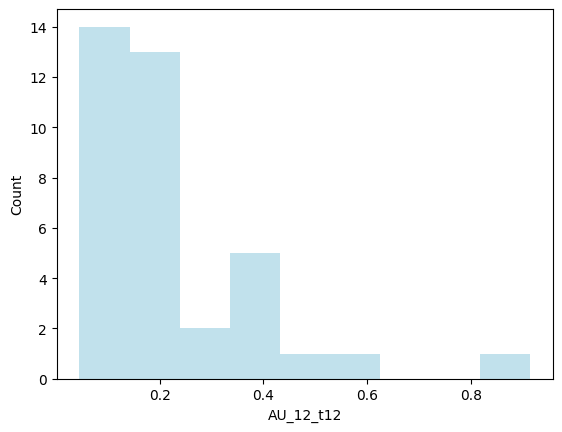

In [38]:
import seaborn as sns

sns.histplot(x = au_12_t12_class_1, color = "lightblue", edgecolor = 'None') # Spread of au_12_t12_class_1

A2

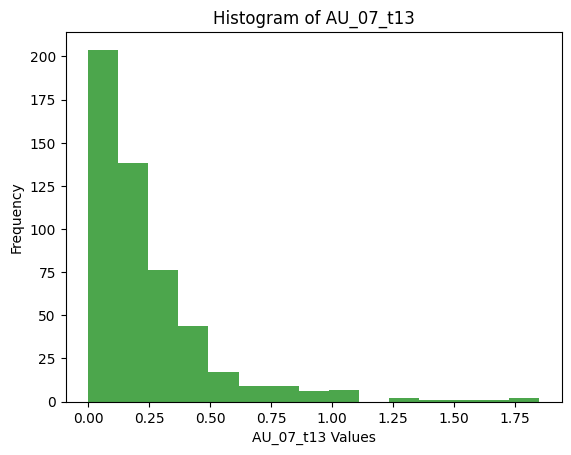

Mean: 0.23821816307063998
Variance: 0.06953914496080574


In [24]:
hist, bin_edges = np.histogram(data['AU_07_t13'], bins=15)

mean_value = np.mean(data['AU_07_t13'])
variance_value = np.var(data['AU_07_t13'])

plt.hist(data['AU_07_t13'], bins=15, alpha=0.7, color='green')
plt.xlabel('AU_07_t13 Values')
plt.ylabel('Frequency')
plt.title('Histogram of AU_07_t13')
plt.show()

print("Mean:", mean_value)
print("Variance:", variance_value)

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id']) # Label encoding
print(data.head())

   Unnamed: 0  id   age  gender  diagnosed  AU_01_t12  AU_06_t12  AU_12_t12  \
0           0   0  65.0       1          1   0.079102   0.252395   0.482137   
1           1   1  57.0       1          1   0.059371   0.086916   0.147827   
2           2   2  51.0       1          0   0.228496   0.517799   0.077302   
3           3   3  72.0       1          1   0.058291   0.077728   0.170557   
4           4   4  86.0       0          0   0.008417   0.215586   0.103639   

   AU_04_t13  AU_07_t13  AU_09_t13  AU_01_t14  AU_02_t14  AU_04_t14  
0   0.216193   0.074656   0.005104   0.276285   0.103460   1.463085  
1   0.321326   0.100838   0.015806   0.339573   0.034221   0.327894  
2   0.023963   0.008114   0.009518   0.249356   0.187397   0.123984  
3   0.243995   0.012674   0.108509   1.021001   1.738898   0.254853  
4   0.081530   0.192569   0.007118   0.000000   0.000000   0.000000  


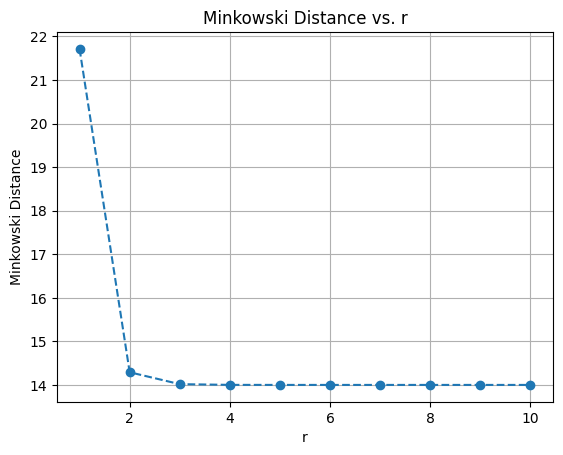

In [26]:
vector1 = data.iloc[3, :] #iloc[rows,cols]
vector2 = data.iloc[4, :]
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r) #formula = sum i to n(|Xi - Yi|^r)^1/r
    distances.append(distance)

plt.plot(r_values, distances, marker='o', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
x = data.drop("diagnosed",axis=1) #traning set
y = data["diagnosed"] # Labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#x_train is traning set , Xtest is testing set
#y_train is traning set , Ytest is testing set

In [28]:
print(x_test)
print(y_test)

     Unnamed: 0   id   age  gender  AU_01_t12  AU_06_t12  AU_12_t12  \
231         231  133  60.0       0   0.104666   0.365643   0.229930   
401         401  392  67.0       1   0.198692   0.416175   0.158103   
428         428  421  65.0       0   0.067903   0.257276   0.370245   
263         263   91  69.0       1   0.065976   0.443624   0.314699   
237         237  113  68.0       0   0.064867   0.337041   0.100205   
..          ...  ...   ...     ...        ...        ...        ...   
359         359  262  62.0       0   0.061409   0.043559   0.273672   
307         307  286  76.0       1   0.060084   0.027127   0.098104   
128         128  213  76.0       0   0.031500   0.510877   0.904483   
319         319  298  65.0       0   0.027215   0.037340   0.025285   
117         117  226  66.0       1   0.034165   0.629569   0.255505   

     AU_04_t13  AU_07_t13  AU_09_t13  AU_01_t14  AU_02_t14  AU_04_t14  
231   0.421384   0.144114   0.039107   0.063300   0.017284   0.349627  
401

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) # Inisiating KNN class from Sklearn library
knn.fit(x_train,y_train) #fiting the data into the model and traning it

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.score(x_test,y_test)

0.9423076923076923

Confusion Matrix:
[[95  3]
 [ 3  3]]
Precision: 0.5
Recall: 0.5
F1-Score: 0.5
accuracy-Score: 0.9423076923076923
The model has a regular fit.


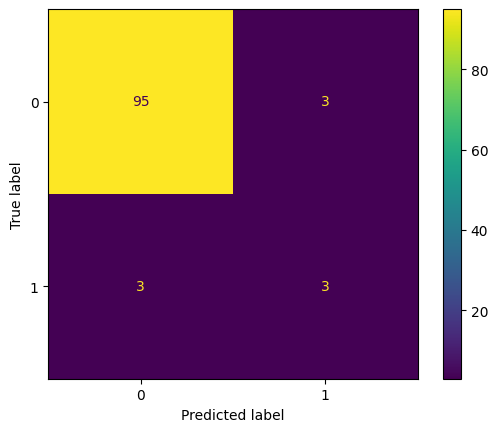

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
y_pred = knn.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
display = ConfusionMatrixDisplay(confusion,display_labels=knn.classes_)
display.plot()
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"accuracy-Score: {accuracy}")


if precision > recall:
    print("The model is tending towards overfitting.")
elif precision < recall:
    print("The model is tending towards underfitting.")
else:
    print("The model has a regular fit.")
